In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K
from IPython.display import display


In [14]:
facialpoints_df = pd.read_csv('KeyFacialPoints.csv')

In [15]:
facialpoints_df.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [16]:
facialpoints_df.shape

(2140, 31)

In [17]:
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [18]:
facialpoints_df['Image'][1] #Take a look at sample image 0-- Black, 255-- White

'219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110 108 105 104 110 130 140 149 152 128 106 106 91 78 90 107 101 84 90 93 79 75 73 59 58 74 94 102 100 99 97 90 94 96 95 92 88 86 231 224 212 197 191 186 176 170 172 190 201 199 200 203 204 210 215 211 210 213 213 217 210 192 188 188 189 194 189 183 181 183 175 158 158 158 142 132 133 131 125 120 121 120 116 115 116 122 135 137 129 122 121 125 121 119 120 118 117 112 112 109 116 136 149 156 149 126 109 

In [19]:
# Images are in space separated string format, we have to convert this into numpy array. Then convert the 1D array --> 2D array of size 96 x 96
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96,96))

In [20]:
facialpoints_df['Image'][1].shape #Shape of the resized 2D Array

(96, 96)

In [21]:
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [22]:
print("mean = ",facialpoints_df['right_eye_center_x'].mean())
print("max = ",facialpoints_df['right_eye_center_x'].max())
print("min = ",facialpoints_df['right_eye_center_x'].min())

mean =  29.64026856456148
max =  42.495171727
min =  18.9226106286


In [23]:
facialpoints_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

### Perform Image Visualization

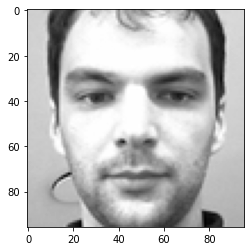

In [26]:
# Plot a random image from the dataset along with facial keypoints
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')

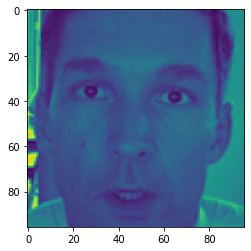

In [29]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'viridis')

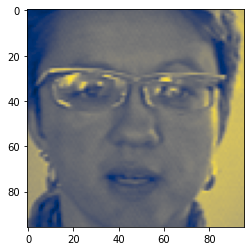

In [32]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'cividis')

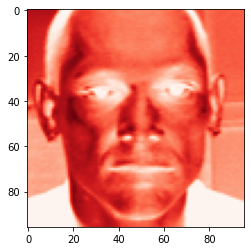

In [33]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'Reds')

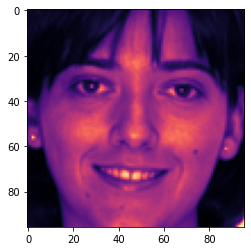

In [34]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'magma')

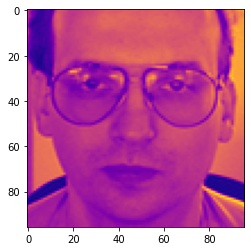

In [35]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'plasma')

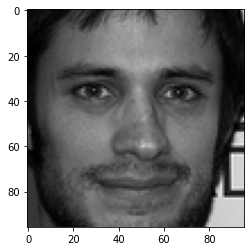

In [44]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')

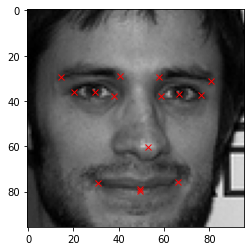

In [45]:
plt.figure()
plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
#Here in this for loop we are plotting the (x,y) coordinates of different 15 key features of the Facial Data
for j in range(1,31,2):
    plt.plot(facialpoints_df.loc[i][j-1],facialpoints_df.loc[i][j], 'rx')

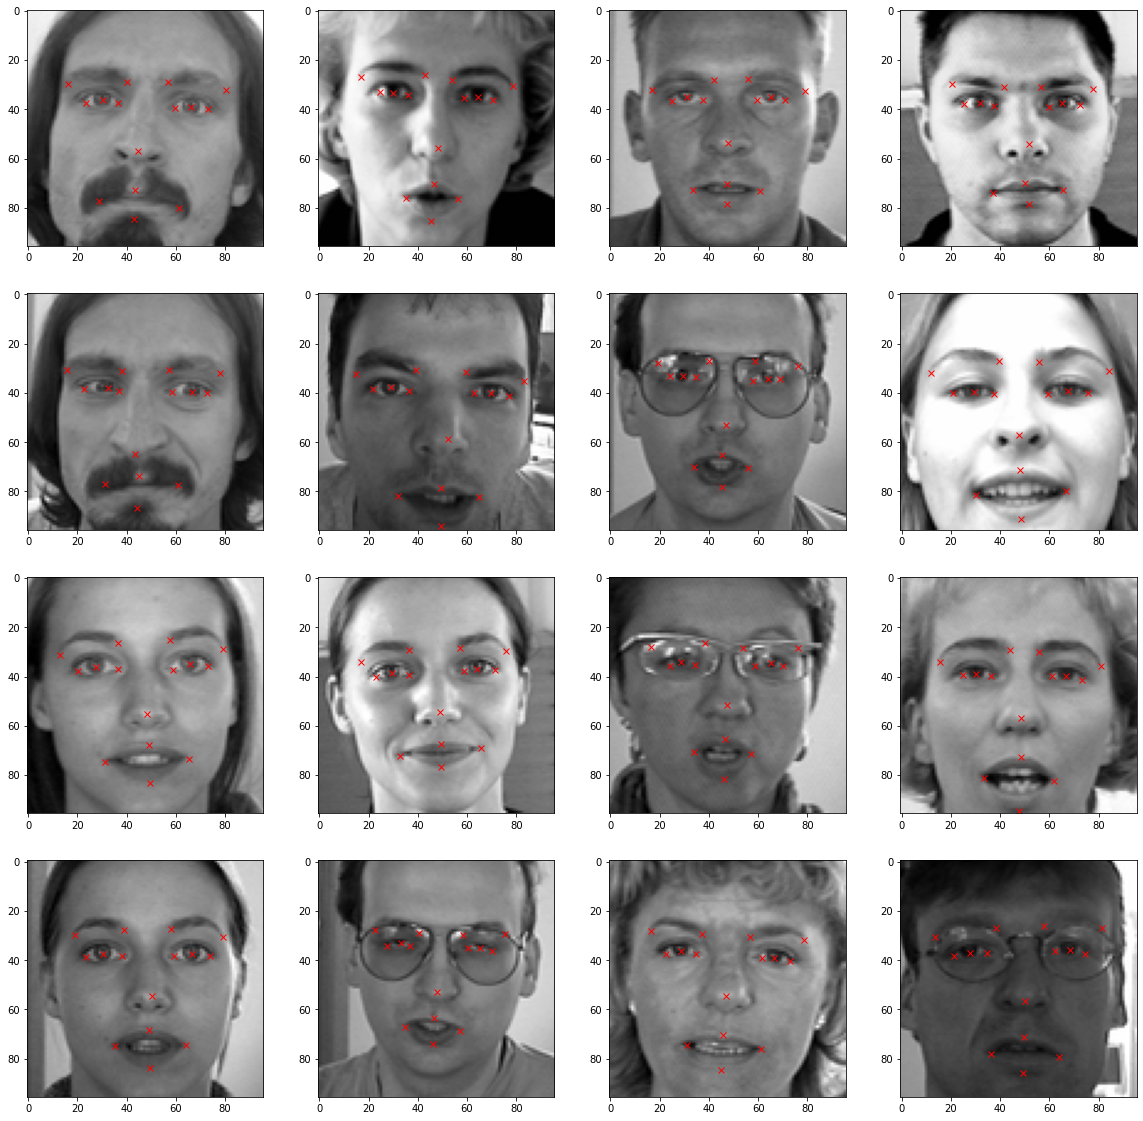

In [46]:
import random 

#lets view more images in a grid format
fig = plt.figure(figsize = (20,20))

for i in range(16): #Showing 16 images in a grid
    ax = fig.add_subplot(4,4,i+1)
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')

#### Mini Challenge 2 , plot 64 random images

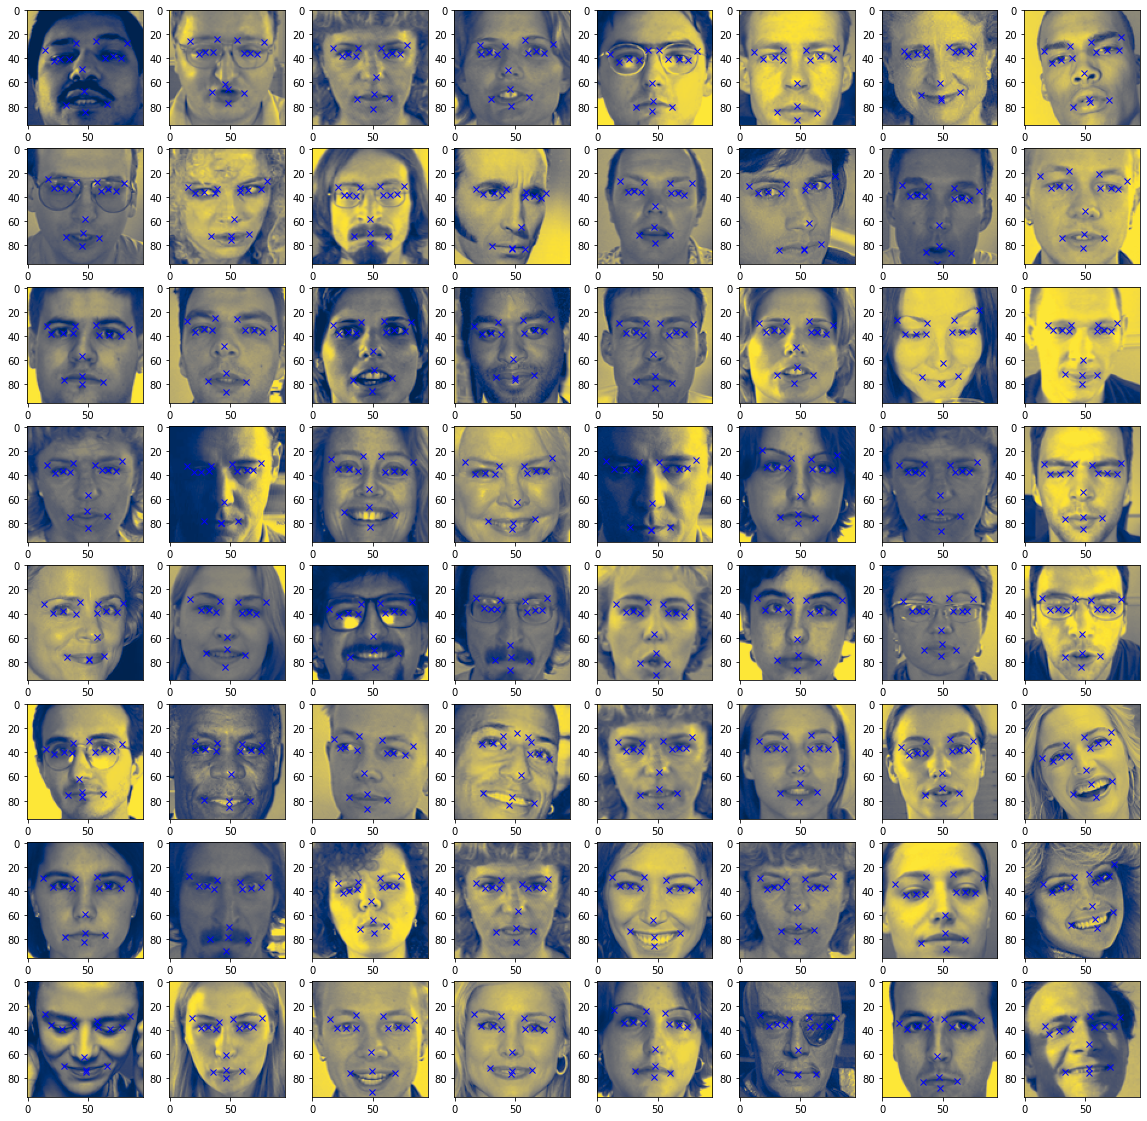

In [48]:
import random 
arr = random.sample(range(len(facialpoints_df)), 64)
#arr = np.random.randint(64, len(facialpoints_df))

#lets view more images in a grid format
fig = plt.figure(figsize = (20,20))
k = 0
for i in arr: #Showing 64 images in a grid
    ax = fig.add_subplot(8,8,k+1)
    k += 1
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'cividis')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'bx')

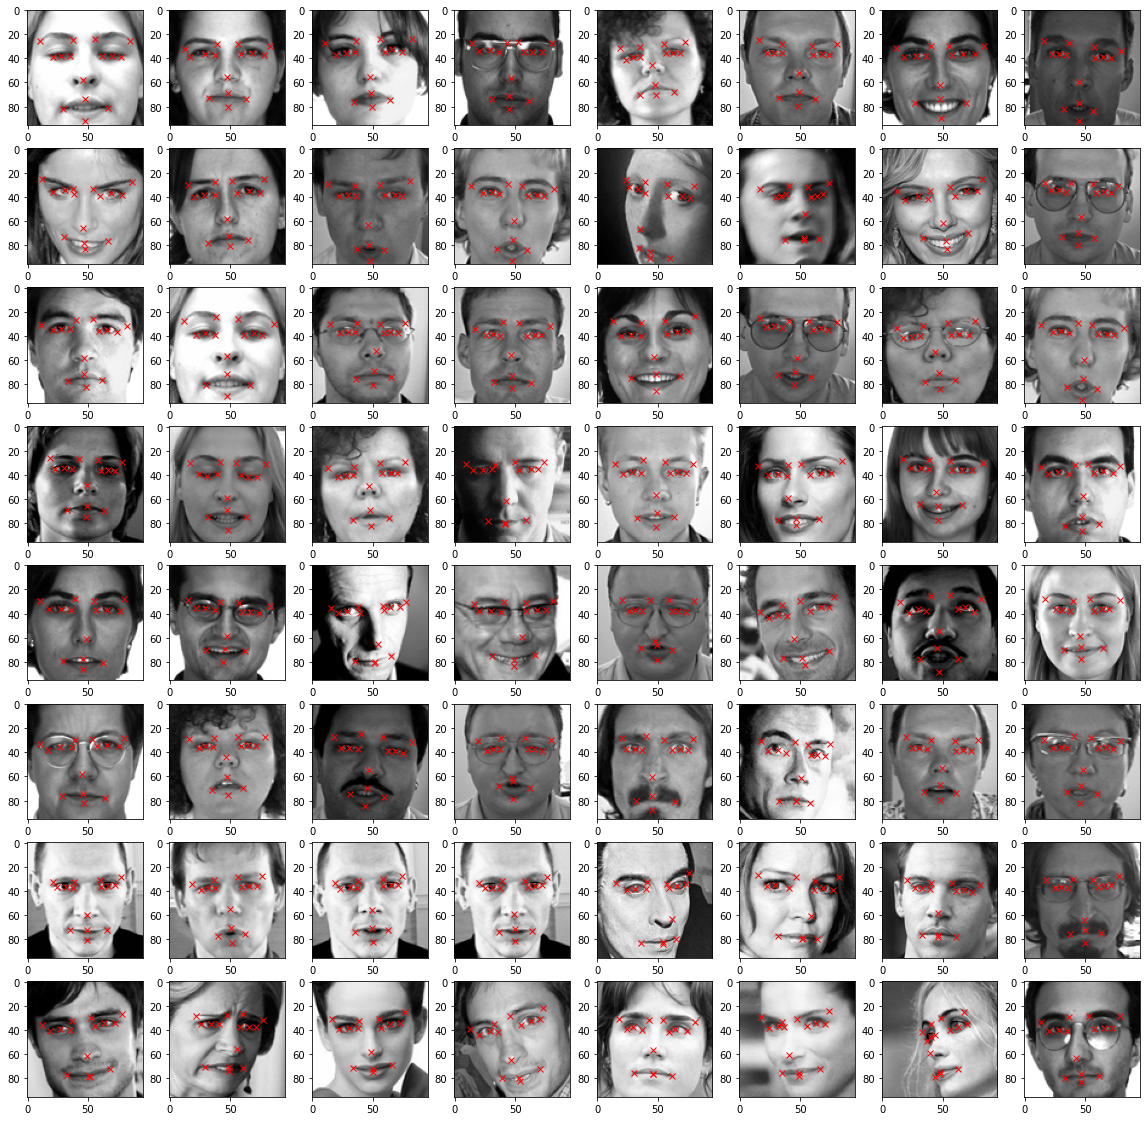

In [49]:

#lets view more images in a grid format
fig = plt.figure(figsize = (20,20))

for i in range(64): #Showing 16 images in a grid
    ax = fig.add_subplot(8,8,i+1)
    img = np.random.randint(1, len(facialpoints_df))
    image = plt.imshow(facialpoints_df['Image'][img], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[img][j-1], facialpoints_df.loc[img][j], 'rx')

## Perform Image Augmentation

In [50]:
import copy 
face_df = facialpoints_df.copy()
#Create a new copy of the dataframe

In [51]:
face_df.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  [[238, 236, 237, 238, 240, 240, 239, 241, 241,...  
1  [[219, 215, 204, 196, 204, 211, 212, 200, 180,...  
2  [[144, 142, 159, 180, 188, 188, 184, 180, 167,...  
3  [[193, 192, 193, 194, 194, 194, 193, 192, 168,...  
4  [[147, 148, 160, 196, 215, 214, 216, 217, 219,...  

[5 rows x 31 columns]

In [52]:
#Obtain the header of the Dataframe (names of columns)
columns = face_df.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [53]:
face_df['Image'][0] #Take a look at the pixel values of a sample image 

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

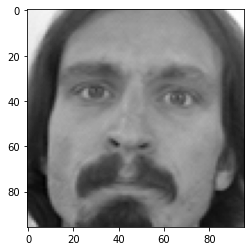

In [54]:
plt.imshow(face_df['Image'][0], cmap = 'gray')

We will be doing two kinds of Image Augmentation \
1:Flip the image \
2:Increase the brightness

In [55]:
# Flip the image vertically along the Y-axis
face_df['Image'] = face_df['Image'].apply(lambda x: np.flip(x, axis = 1))

In [56]:
#Here is the array with pixel values flipped
face_df['Image'][0]

array([[250, 250, 250, ..., 237, 236, 238],
       [251, 250, 249, ..., 236, 238, 235],
       [250, 251, 251, ..., 237, 236, 237],
       ...,
       [ 60,  57,  52, ..., 181, 183, 186],
       [ 78,  69,  61, ..., 207, 188, 189],
       [ 90,  75,  70, ..., 184, 184, 191]])

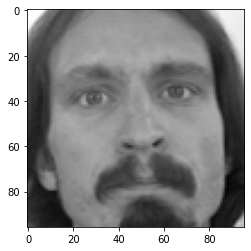

In [57]:
plt.imshow(face_df['Image'][0], cmap = 'gray') #Plotting the Flipped Sample Image

In [58]:
#Since we are flipping the images horizontally, Y-coordinate values would be same 
#X-coordinate values only would need to change, subtract x from 96 to do the flipping operation
for i in range(len(columns)):
    if i%2 == 0:
        face_df[columns[i]] = face_df[columns[i]].apply(lambda x: 96. - float(x))

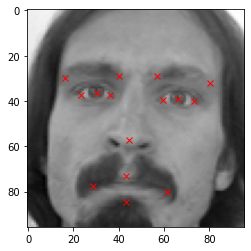

In [59]:
#View original image
plt.imshow(facialpoints_df['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(facialpoints_df.loc[0][j-1], facialpoints_df.loc[0][j], 'rx')

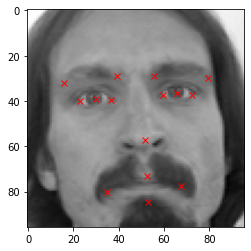

In [60]:
#View Flipped image along with all the key points
plt.imshow(face_df['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(face_df.loc[0][j-1], face_df.loc[0][j], 'rx')

In [61]:
#Concatenate the original dataframe with the Augmented Dataframe
face_df_aug = np.concatenate((facialpoints_df,face_df))

In [62]:
face_df_aug.shape # We can see that the size of data is increased.

(4280, 31)

#### Image Augmentation 2 -- Increase the brightness of the image

In [63]:
#Randomly increasing the brightness of images
# Multiply pixel values by a random number between 1 and 2 , then clip the value between 0 and 255
import random

face_df_brt = facialpoints_df.copy()
face_df_brt['Image'] = facialpoints_df['Image'].apply(lambda x: np.clip(random.uniform(1,2)*x, 0, 255))
face_df_aug = np.concatenate((face_df_aug, face_df_brt))
face_df_aug.shape

(6420, 31)

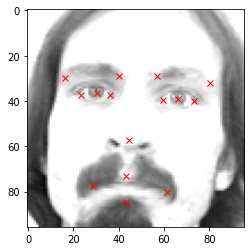

In [64]:
#Plot the image with increased brightness
plt.imshow(face_df_brt['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(face_df_brt.loc[0][j-1], face_df_brt.loc[0][j], 'rx')

### Mini Challenge 3-- Flipping vertically - along X-axis, y-coordinates would change 

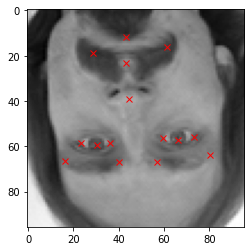

In [65]:
face_df_new = facialpoints_df.copy()
face_df_new['Image'] = face_df_new['Image'].apply(lambda x: np.flip(x, axis = 0))
for i in range(len(columns)):
    if i%2 != 0:
        face_df_new[columns[i]] = face_df_new[columns[i]].apply(lambda x: 96. - float(x))
#View Flipped image along with all the key points
plt.imshow(face_df_new['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(face_df_new.loc[0][j-1], face_df_new.loc[0][j], 'rx')

In [66]:
face_df_new['Image'][0]

array([[191, 184, 184, ...,  70,  75,  90],
       [189, 188, 207, ...,  61,  69,  78],
       [186, 183, 181, ...,  52,  57,  60],
       ...,
       [237, 236, 237, ..., 251, 251, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [238, 236, 237, ..., 250, 250, 250]])

In [67]:
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

### Perform Normalization and Training Data Preparation

In [68]:
#Normalize the images 
img = face_df_aug[:,30] #Taking only the last column , Image column
img = img/255.

#Create an empty array of shape (6420, 96, 96, 1) to train the model
X = np.empty((len(img), 96, 96, 1))

#Iterate through the normalized images list and add image values to empty array
#We have to expand dimension from (96,96) to (96,96,1)
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis = 2)
    
#Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [69]:
#Obtain the values of key face points coordinates, which are used as Target
y = face_df_aug[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [70]:
#Train and Test data split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [71]:
X_train.shape

(5136, 96, 96, 1)

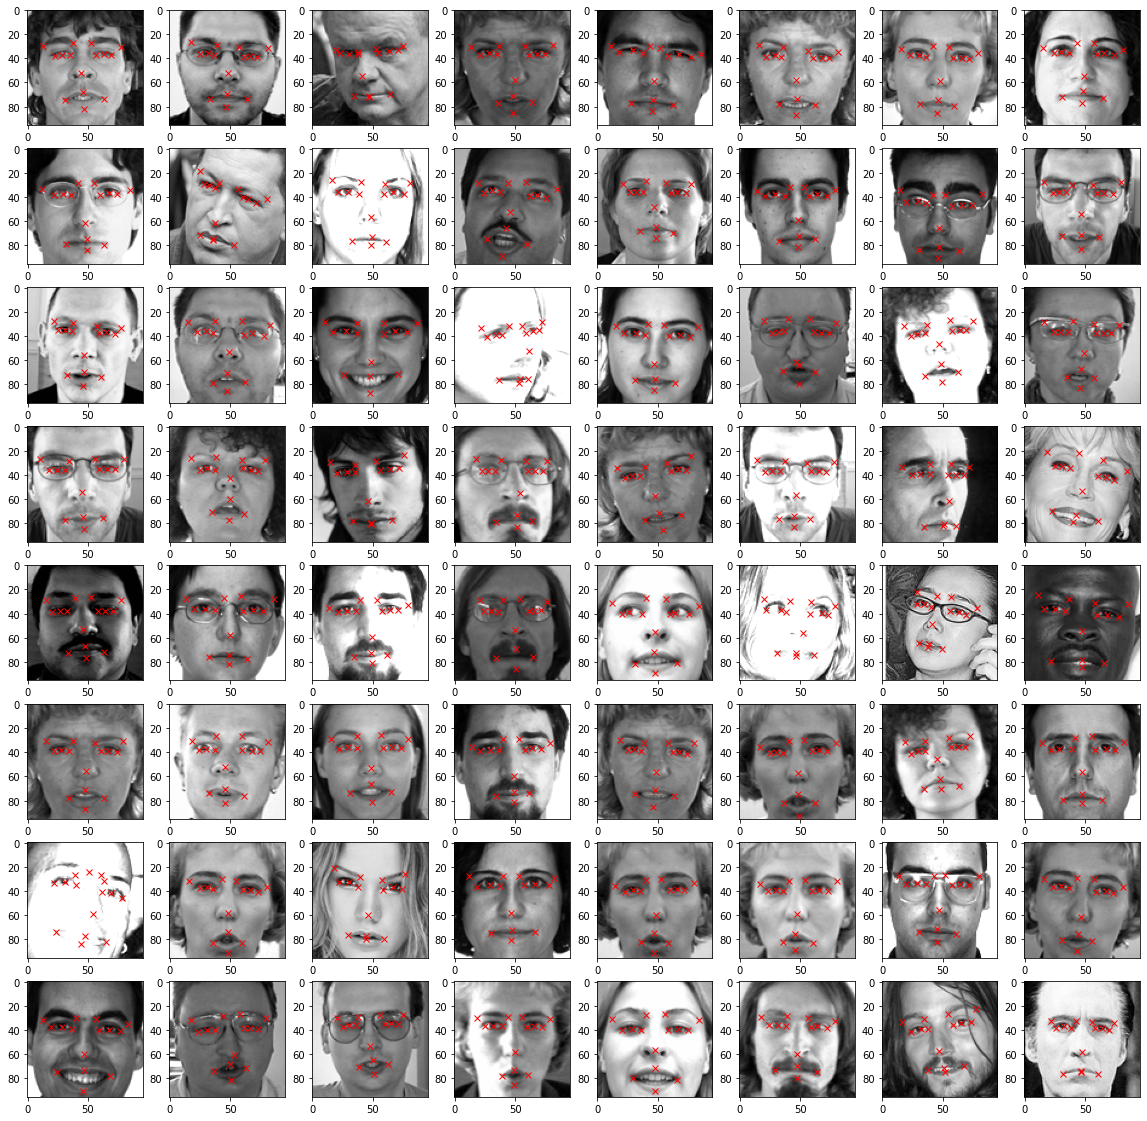

In [72]:
#lets view more images in a grid format
fig = plt.figure(figsize = (20,20))

for i in range(64): #Showing 16 images in a grid
    ax = fig.add_subplot(8,8,i+1)
    image = plt.imshow(X_train[i].reshape(96,96), cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(y_train[i][j-1], y_train[i][j], 'rx')

## Deep Residual Neural Network Model

Res Block -- [Input -> Convolution_Block -> Identity_Block -> Identity_Block -> Output]

Final Model -- [INPUT -> Zero_padding -> Conv2D -> BatchNorm,Relu -> MaxPool2D -> Res-Block -> Res-Block -> AveragePooling2D -> Flatten()-> Dense Layer, Relu, Dropout -> Dense Layer, Relu, Dropout -> Dense Layer, Relu -> KEY POINTS]

Convolution Block , Identity Block

In [83]:
def res_block(X, filter, stage):
    
    #Convolution Block
    X_copy = X
    f1, f2, f3 = filter
    
    #Main Path
    X = Conv2D(f1, (1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_a', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3), strides = (1,1), padding  = 'same', name = 'res_'+str(stage)+'_conv_b', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_c', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_conv_c')(X)
    
    #Short Path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_copy',kernel_initializer = glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis = 3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)
    
    #Add data from main and short paths
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    #Identity Block 1
    X_copy = X
    
    #Main Path
    X = Conv2D(f1, (1,1), strides = (1,1), name = 'res_'+str(stage)+ '_identity_1_a',kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3), strides = (1,1), padding = 'same', name = 'res_'+str(stage)+'_identity_1_b', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_' + str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_1_c',kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3 , name = 'bn_'+str(stage)+'_identity_1_c')(X)
    
    #Add both paths together (Note that we are feeding the original inputas is hence the name "identity")
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    #Identity Block 2
    X_copy = X
    
    #Main Path
    X = Conv2D(f1, (1,1), strides = (1,1), name = 'res_'+str(stage)+ '_identity_2_a',kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3), strides = (1,1), padding = 'same', name = 'res_'+str(stage)+'_identity__b', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_' + str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_2_c',kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3 , name = 'bn_'+str(stage)+'_identity_2_c')(X)
    
    #Add both paths together (Note that we are feeding the original inputas is hence the name "identity")
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    return X
    

In [84]:
input_shape = (96,96,1)

#Input Tensor Shape
X_input = Input(input_shape)

#Zero-padding
X = ZeroPadding2D((3,3))(X_input)

#Stage 1
X = Conv2D(64, (7,7), strides = (2,2), name = 'conv1', kernel_initializer = glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides = (2,2))(X)

#Stage 2
X = res_block(X, filter = [64,64,256], stage = 2)

#Stage 3
X = res_block(X, filter = [128, 128, 512], stage = 3)

#Average Pooling
X = AveragePooling2D((2,2), name = 'Average_Pooling')(X)

#Final Layer 
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation  = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)

model = Model(inputs = X_input, outputs = X)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 102, 102, 1)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

## Compile and Train Deep Learning Model


In [85]:
adam = tf.keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])


In [86]:
#Saving the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only = True)

In [87]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 100, validation_split = 0.05, callbacks = [checkpointer])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 498.0831 - accuracy: 0.4021
Epoch 00001: val_loss improved from inf to 2318.37231, saving model to weights.hdf5
20/20 [==============================] - 71s 4s/step - loss: 498.0831 - accuracy: 0.4021 - val_loss: 2318.3723 - val_accuracy: 0.0311
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 170.5854 - accuracy: 0.4417
Epoch 00002: val_loss improved from 2318.37231 to 1983.85669, saving model to weights.hdf5
20/20 [==============================] - 65s 3s/step - loss: 170.5854 - accuracy: 0.4417 - val_loss: 1983.8567 - val_accuracy: 0.6809
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 141.1531 - accuracy: 0.5618
Epoch 00003: val_loss improved from 1983.85669 to 1650.44958, saving model to weights.hdf5
20/20 [==============================] - 67s 3s/step - loss: 141.1531 - accuracy: 0.5618 - val_loss: 1650.4496 - val_accuracy: 0.6809
Epoch 4/100
20/20 [======================

20/20 [==============================] - 54s 3s/step - loss: 10.9965 - accuracy: 0.6768 - val_loss: 80.0446 - val_accuracy: 0.6848
Epoch 28/100
20/20 [==============================] - ETA: 0s - loss: 11.8974 - accuracy: 0.6741
Epoch 00028: val_loss improved from 80.04464 to 73.26170, saving model to weights.hdf5
20/20 [==============================] - 54s 3s/step - loss: 11.8974 - accuracy: 0.6741 - val_loss: 73.2617 - val_accuracy: 0.6848
Epoch 29/100
20/20 [==============================] - ETA: 0s - loss: 10.8833 - accuracy: 0.6885
Epoch 00029: val_loss did not improve from 73.26170
20/20 [==============================] - 52s 3s/step - loss: 10.8833 - accuracy: 0.6885 - val_loss: 98.5702 - val_accuracy: 0.6965
Epoch 30/100
20/20 [==============================] - ETA: 0s - loss: 13.4817 - accuracy: 0.6587
Epoch 00030: val_loss improved from 73.26170 to 69.62519, saving model to weights.hdf5
20/20 [==============================] - 54s 3s/step - loss: 13.4817 - accuracy: 0.6587 - 

20/20 [==============================] - ETA: 0s - loss: 16.6852 - accuracy: 0.6696
Epoch 00056: val_loss did not improve from 56.26628
20/20 [==============================] - 50s 2s/step - loss: 16.6852 - accuracy: 0.6696 - val_loss: 103.5806 - val_accuracy: 0.6809
Epoch 57/100
20/20 [==============================] - ETA: 0s - loss: 18.7723 - accuracy: 0.6727
Epoch 00057: val_loss did not improve from 56.26628
20/20 [==============================] - 50s 3s/step - loss: 18.7723 - accuracy: 0.6727 - val_loss: 86.7031 - val_accuracy: 0.6031
Epoch 58/100
20/20 [==============================] - ETA: 0s - loss: 16.5294 - accuracy: 0.6536
Epoch 00058: val_loss did not improve from 56.26628
20/20 [==============================] - 50s 2s/step - loss: 16.5294 - accuracy: 0.6536 - val_loss: 119.3831 - val_accuracy: 0.5798
Epoch 59/100
20/20 [==============================] - ETA: 0s - loss: 14.4221 - accuracy: 0.6659
Epoch 00059: val_loss did not improve from 56.26628
20/20 [===============

20/20 [==============================] - ETA: 0s - loss: 7.0485 - accuracy: 0.7489
Epoch 00085: val_loss did not improve from 48.64173
20/20 [==============================] - 50s 3s/step - loss: 7.0485 - accuracy: 0.7489 - val_loss: 55.5234 - val_accuracy: 0.7121
Epoch 86/100
20/20 [==============================] - ETA: 0s - loss: 6.7486 - accuracy: 0.7448
Epoch 00086: val_loss did not improve from 48.64173
20/20 [==============================] - 51s 3s/step - loss: 6.7486 - accuracy: 0.7448 - val_loss: 52.1257 - val_accuracy: 0.7160
Epoch 87/100
20/20 [==============================] - ETA: 0s - loss: 6.1067 - accuracy: 0.7495
Epoch 00087: val_loss did not improve from 48.64173
20/20 [==============================] - 50s 3s/step - loss: 6.1067 - accuracy: 0.7495 - val_loss: 63.0647 - val_accuracy: 0.7549
Epoch 88/100
20/20 [==============================] - ETA: 0s - loss: 18.2807 - accuracy: 0.7133
Epoch 00088: val_loss did not improve from 48.64173
20/20 [=======================

In [99]:
#Save the trained model

model_json = model.to_json()
with open('KeyFacialPoints.json', 'w') as json_file:
    json_file.write(model_json)

## Assessing the performance of the trained model

In [89]:
#Evaluating the tarined model

result = model.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 5s 118ms/step - loss: 59.2446 - accuracy: 0.6978
Accuracy : 0.6978192925453186


In [90]:
#Getting the model history keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

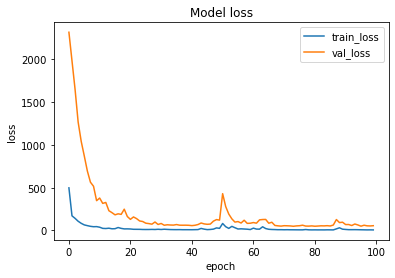

In [92]:
#Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.show()

In [93]:
# Make prediction using the testing dataset
df_predict = model.predict(X_test)

In [94]:
# Print the rmse loss values

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE value : {}".format(rms))

RMSE value : 7.6970535090349514


In [95]:
# Convert the predicted values into a dataframe

df_predict= pd.DataFrame(df_predict, columns = columns)
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          67.341217          37.405930           32.503330   
1          66.255508          37.029968           28.800539   
2          71.469177          34.562378           31.198294   
3          67.959007          38.711082           28.684084   
4          67.170044          38.962650           29.841047   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           39.740936                60.209549                39.028164   
1           36.118793                60.151283                37.701504   
2           36.626137                64.888786                35.732800   
3           41.735004                61.411171                39.762203   
4           39.171272                60.227947                40.034992   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                74.806313                37.688618                 39.327309   
1                72.628838                38.227650                 35.557743   
2                78.231033                35.613506                 38.769016   
3                75.707733                39.799305                 36.004082   
4                74.635910                39.986515                 37.200226   

   right_eye_inner_corner_y  ...  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                 40.399830  ...   50.158386   59.960003            68.063591   
1                 36.986988  ...   50.345139   56.171398            61.328686   
2                 36.714214  ...   55.881317   49.887306            69.557236   
3                 41.518196  ...   50.107307   50.414600            68.020721   
4                 40.061413  ...   49.853813   58.558250            63.822624   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            73.303619             35.892345             75.054642   
1            75.942795             33.279190             75.597450   
2            74.155304             39.476028             75.568939   
3            77.419403             35.605408             80.037308   
4            80.605484             34.585800             81.069397   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               51.819515               74.241447                  52.051723   
1               48.558296               70.968658                  48.196758   
2               55.308208               67.723320                  55.167229   
3               51.493679               68.418388                  52.007534   
4               49.733658               75.488289                  49.604504   

   mouth_center_bottom_lip_y  
0                  79.964470  
1                  83.331467  
2                  81.316971  
3                  86.960091  
4                  87.593933  

[5 rows x 30 columns]

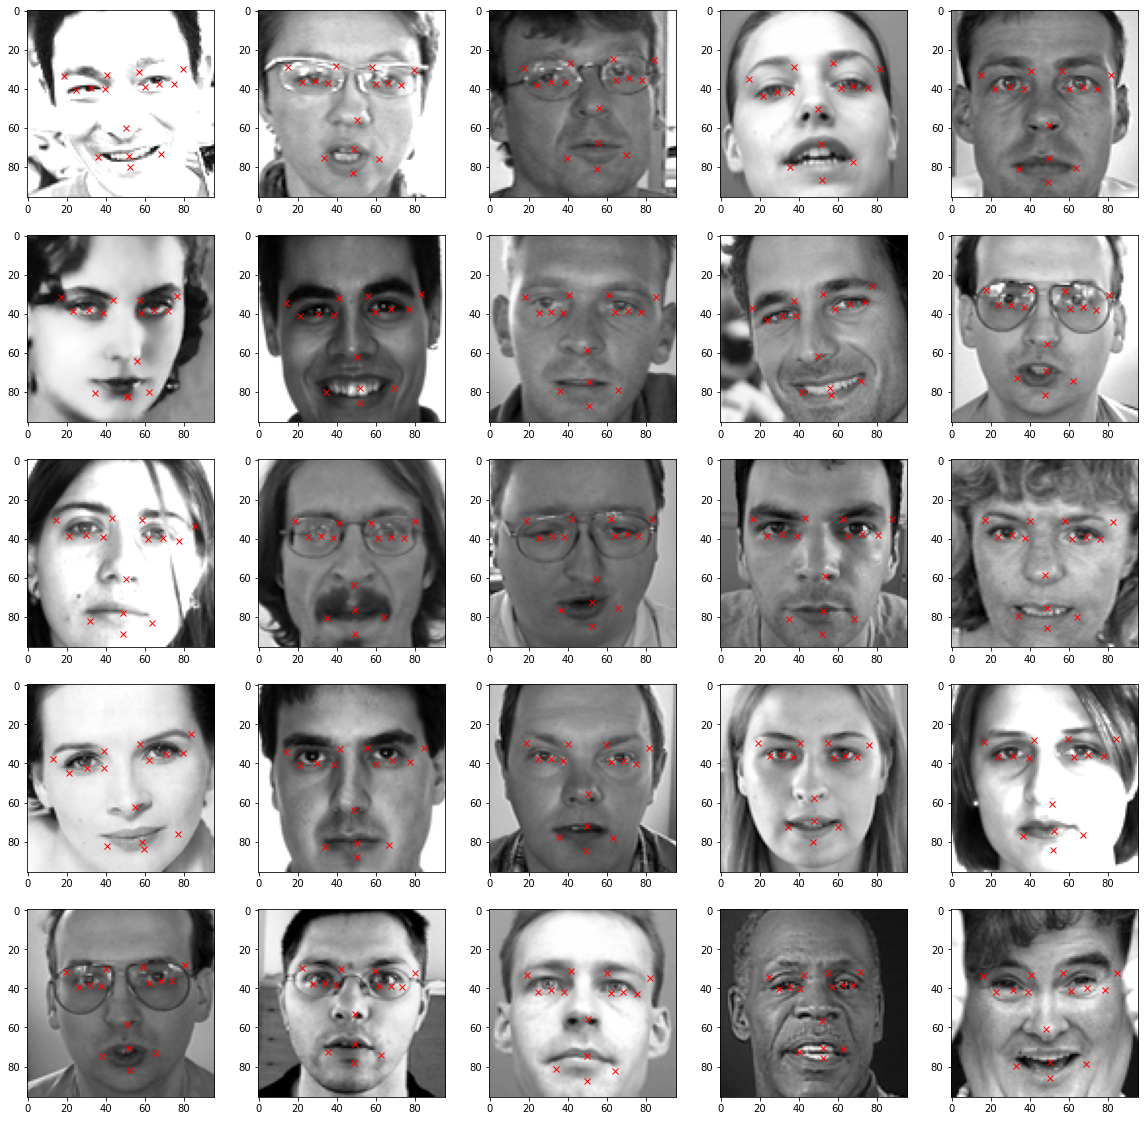

In [101]:
# Plot the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')